We plot the gap distance for a fixed input norma for a range of value of delta.

In [1]:
import torch
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker
import perturbed_organics.utils as utils
import math


plt.rcParams.update({
    "text.usetex": False, 
    "font.family": "serif", 
    "font.serif": ["Computer Modern Roman", "DejaVu Serif", "Bitstream Vera Serif"],
    "mathtext.fontset": "cm" 
})
cmap = 'plasma_r'

In [2]:
model_type = ""
# model_type = "_rectified"
# model_type = "_rectified_recurrence"

input_type = 'delocalized'
mu = "-0.5"
mu_val = float(mu)

# model_type = ''
folder_loc = f'/scratch/sr6364/perturbed_organics/data/adaptive_phase_diagram_100_large_delta{model_type}/{input_type}'
# folder_name = f'{input_type}_goe_symmetric_N_100_s_100_mu_{mu}_num_delta_200_num_input_200_num_trials_100_b0_1.0_b1_1.0_phase_diagram_linear{model_type}'
folder_name = f'{input_type}_goe_symmetric_N_100_s_100_mu_{mu}_num_delta_200_num_input_200_num_trials_100_b0_1.0_b1_1.0_phase_diagram_log-scale{model_type}'


path = os.path.join(folder_loc, folder_name)

In [3]:
# Load parameters from the JSON file
param_file_path = os.path.join(path, 'parameters.json')
with open(param_file_path, 'r') as f:
    params = json.load(f)

# Extract parameters
N = params['N']
num_tasks = params['num_tasks']
num_delta = params['num_delta']
num_input = params['num_input']
num_trials = params['num_trials']
delta_scale = params['delta_scale']
delta_range = np.array(params['delta_range'])
input_range = np.array(params['input_range'])

In [4]:
# # anaytical curves

# num_points_to_exclude = 3
# idx = 0
# norm_sol_idx = []
# for input_norm in input_range:
#     z = utils.make_input_drive(N=N, input_type=params['model_name'], input_norm=input_norm)
#     norm_eqn = torch.sqrt(z ** 2 / (params['sigma']**2 + torch.norm(z) ** 2))
#     norm_sol_idx.append(norm_eqn[idx].item())
# norm_sol_idx = np.array(norm_sol_idx)

# # analytical solution for the mean of the fixed point
# # G = (1 - np.sqrt(params['sigma'] ** 2 + input_range ** 2)) / (params['sigma'] ** 2 + input_range ** 2)

# # analytical_mean = norm_sol_idx + mu_val * input_range * G * (1 - input_range ** 2 / (params['sigma'] ** 2 + input_range ** 2)) / np.sqrt(N)
# # delta_c =  math.sqrt(2 * N) * analytical_mean / (G * input_range)
# # delta_c = delta_c[:-num_points_to_exclude]
# # new_input_norm = input_range[:-num_points_to_exclude]

In [5]:
## original code for perturbation theory

# def analytical_curve_mu(mu_value=0.0):
#     analytical_mean = norm_sol_idx + mu_value * input_range * G * (1 - input_range ** 2 / (params['sigma'] ** 2 + input_range ** 2)) / np.sqrt(N)
#     delta_c =  math.sqrt(2 * N) * analytical_mean / (G * input_range)
#     delta_c = delta_c[:-num_points_to_exclude]
#     new_input_norm = input_range[:-num_points_to_exclude]
#     return new_input_norm, delta_c

# mu_vals = [0.0, 1.0, 10.0]
# analytical_curves = {}
# for mu_value in mu_vals:
#     new_input_norm, delta_c = analytical_curve_mu(mu_value)
#     analytical_curves[mu_value] = (new_input_norm, delta_c)

#     # plot the analytical curves
# fig, ax = plt.subplots(figsize=(6, 4))
# for mu_value, (new_input_norm, delta_c) in analytical_curves.items():
#     ax.plot(new_input_norm, delta_c, label=f'$\mu = {mu_value}$', linestyle='--')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlabel(r'$z$', fontsize=16)
# ax.set_ylabel(r'$\Delta$', fontsize=16)

# # display legend
# ax.legend(fontsize=12, loc='upper right')

In [6]:
# analytical prediction from perturbation theory
num_points_to_exclude = 3
new_input_norm = input_range[:-num_points_to_exclude]
idx = 0

def analytical_curve_mu(mu_val=0.0):
    G = (1 - np.sqrt(params['sigma'] ** 2 + input_range ** 2)) / (params['sigma'] ** 2 + input_range ** 2)
    F = (1 / (G * np.sqrt(params['sigma'] ** 2 + input_range ** 2))) * (1 + mu_val * (params['sigma'] ** 2) * G / np.sqrt(params['sigma'] ** 2 + input_range ** 2) )
    Delta_c = np.sqrt(2) * np.sqrt(F ** 2 + mu_val ** 2 * input_range ** 2 * (params['sigma'] / (params['sigma'] ** 2 + input_range ** 2)) ** 2)
    return Delta_c[:-num_points_to_exclude]

#caluclate the line for critical value of delta
delta_c = analytical_curve_mu(mu_val=mu_val)

In [7]:
# # actual code from perturbation theory

# mu_vals = [0.0, 1.0, 10.0]
# analytical_curves = {}
# for mu_value in mu_vals:
#     Delta_c = analytical_curve_mu(mu_value)
#     analytical_curves[mu_value] = Delta_c

# # plot the analytical curves
# fig, ax = plt.subplots(figsize=(6, 4))
# for mu_value, Delta_c in analytical_curves.items():
#     ax.plot(new_input_norm, Delta_c, label=f'$\mu = {mu_value}$', linestyle='--')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlabel(r'$z$', fontsize=16)
# ax.set_ylabel(r'$\Delta$', fontsize=16)

# # display legend
# ax.legend(fontsize=12, loc='upper right')

In [8]:
folder_loc = f'../figures/mu_{mu}/fig_histogram{model_type}'
os.makedirs(folder_loc, exist_ok=True)

In [9]:
eigvals = torch.load(os.path.join(path, f'eigvals_J.pt'))

/tmp/ipykernel_1791666/2428405111.py:10: RuntimeWarning: All-NaN slice encountered
  max_real_max = np.nanmax(max_real_each_trial.numpy(), axis=2)


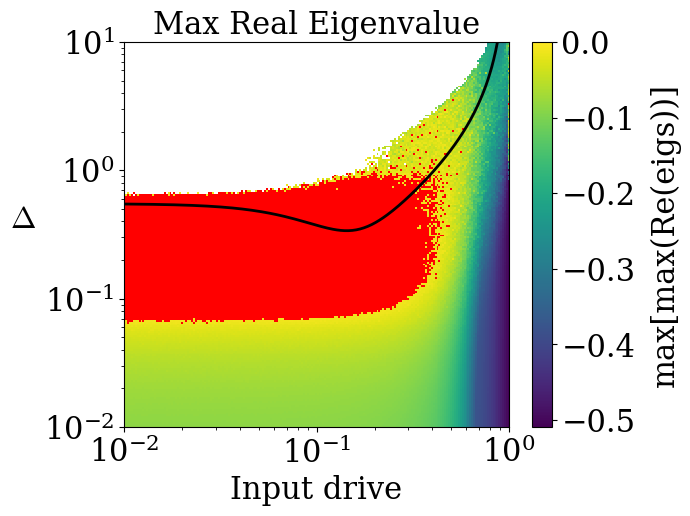

In [10]:
# define the threshold to be considered a non-gapped phase
critical_gap_threshold = 1e-2

# Compute the maximum real part for each trial (max over eigenvalue index)
max_real_each_trial = torch.max(eigvals.real, dim=3)[0] * 0.002  # shape: (num_delta, num_input, num_trials)

# find the max of the trials; ignore the trials with positive values
max_real_each_trial[max_real_each_trial > 0] = np.nan

max_real_max = np.nanmax(max_real_each_trial.numpy(), axis=2)

# find the values that are less than the threshold
bool_critically_slowed = np.abs(max_real_max) < critical_gap_threshold

# Determine vmin and vmax ignoring NaN values
vmin = np.nanmin(max_real_max)
vmax = np.nanmax(max_real_max)

# Plot the phase diagram for max(real(eigenvalues)) using a sequential colormap ("viridis")
plt.figure(figsize=(7.5, 5))
norm = mcolors.Normalize(vmin=vmin, vmax=0.0, clip=False)
mesh = plt.pcolormesh(input_range, delta_range, max_real_max, cmap='viridis', norm=norm)
plt.plot(new_input_norm, delta_c, color='k', linewidth=2.0, label=r'$\Delta_c$')
colorbar = plt.colorbar(mesh, fraction=0.046, pad=0.04)
colorbar.ax.tick_params(labelsize=22)
colorbar.set_label('max[max(Re(eigs))]', fontsize=22, rotation=90, labelpad=10)

plt.xlabel('Input drive', fontsize=22)
plt.ylabel(r'$\Delta$', fontsize=22, rotation=0, labelpad=15)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title("Max Real Eigenvalue", fontsize=22)

ax = plt.gca()
if delta_scale == 'log-scale':
    plt.yscale('log')  # Ensure the axis is in log scale
    y_span = np.log10(delta_range[-1]) - np.log10(delta_range[0])
else:  
    y_span = delta_range[-1] - delta_range[0]

plt.xscale('log')
x_span = np.log10(input_range[-1]) - np.log10(input_range[0])
ax.set_aspect(x_span / y_span, adjustable='box')

plt.xlim([input_range[0], input_range[-1]])
plt.ylim([delta_range[0], delta_range[-1]])

# Overlay red for cells where bool_critically_slowed is True
# Create a masked array: only True cells will be unmasked
import numpy.ma as ma
red_mask = ma.masked_where(~bool_critically_slowed, bool_critically_slowed)
plt.pcolormesh(input_range, delta_range, red_mask, cmap=mcolors.ListedColormap(['red']), shading='auto')

# file_name = f'max_eigvals_{input_type}'
# file_save_path = os.path.join(folder_loc, file_name)

# plt.tight_layout()
# plt.savefig(f'{file_save_path}.png', bbox_inches='tight')
# plt.savefig(f'{file_save_path}.svg', format='svg', bbox_inches='tight', dpi=300)
# plt.savefig(f'{file_save_path}.eps', format='eps', bbox_inches='tight', dpi=300)

plt.show()


### For a given value of input norm, find the the gap distance as a function of delta and plot it.

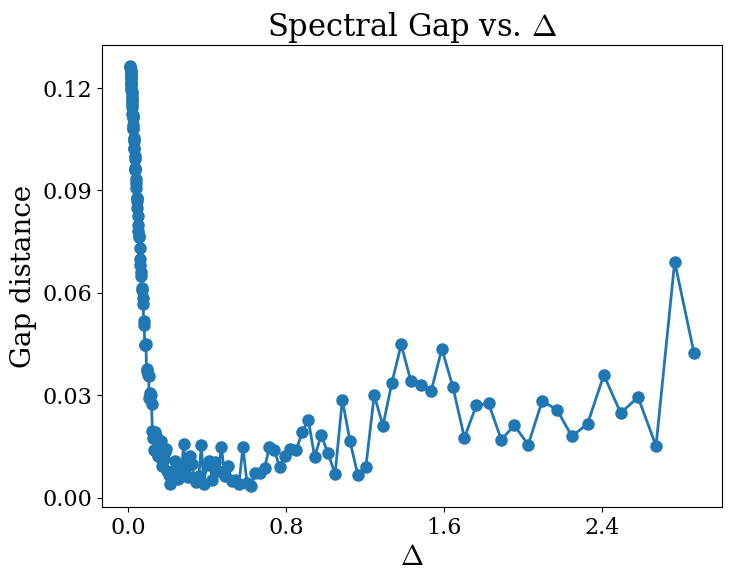

In [11]:
fixed_input_norm = 0.4  # adjust this value as needed
input_idx = np.abs(input_range - fixed_input_norm).argmin()

gap_distance = np.abs(max_real_max[:, input_idx])

plt.figure(figsize=(8,6))
plt.plot(delta_range, gap_distance, marker='o', markersize=8, linewidth=2)

plt.xlabel(r'$\Delta$', fontsize=20)
plt.ylabel('Gap distance', fontsize=20)
plt.title('Spectral Gap vs. $\Delta$', fontsize=22)

# Customize tick parameters for both axes
ax = plt.gca()

# Set maximum number of ticks on the x-axis and y-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))

# Set tick font sizes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()

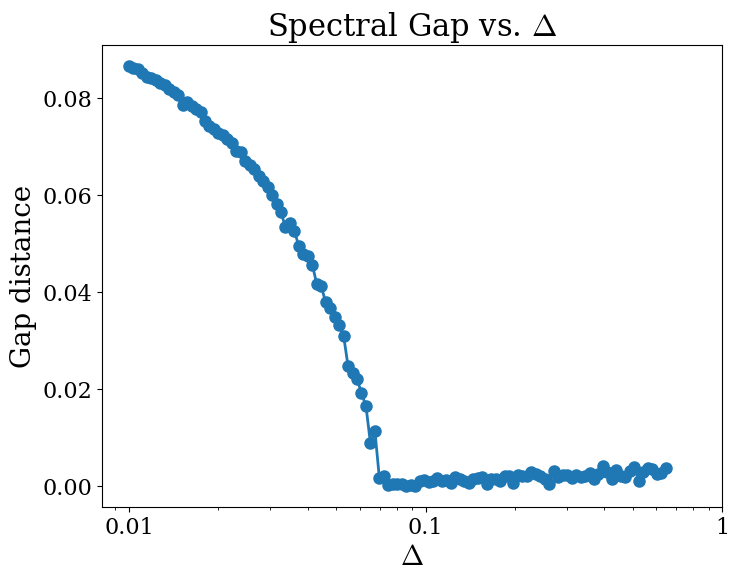

In [12]:
fixed_input_norm = 0.02  # adjust this value as needed
input_idx = np.abs(input_range - fixed_input_norm).argmin()

gap_distance = np.abs(max_real_max[:, input_idx])

plt.figure(figsize=(8,6))
plt.plot(delta_range, gap_distance, marker='o', markersize=8, linewidth=2)

plt.xlabel(r'$\Delta$', fontsize=20)
plt.ylabel('Gap distance', fontsize=20)
plt.title('Spectral Gap vs. $\Delta$', fontsize=22)

# plot x axis in  logscale
plt.xscale('log')

# Customize tick parameters for both axes
ax = plt.gca()

# Set maximum number of ticks on the x-axis and y-axis
tick_values = [0.01, 0.1, 1]
ax.set_xticks(tick_values)
ax.set_xticklabels([str(t) for t in tick_values])

ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))

# Set tick font sizes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Add grid lines for readability
# plt.grid(True, linestyle='--', alpha=0.7)

# os.makedirs(folder_loc, exist_ok=True)
# file_name = f'gap_distance_phase_diagram'
# file_save_path = os.path.join(folder_loc, file_name)

# plt.tight_layout()
# plt.savefig(f'{file_save_path}.png', bbox_inches='tight')
# plt.savefig(f'{file_save_path}.svg', format='svg', bbox_inches='tight', dpi=300)
# plt.savefig(f'{file_save_path}.eps', format='eps', bbox_inches='tight', dpi=300)

plt.show()

Setting y-axis (Critical Delta) to log scale.


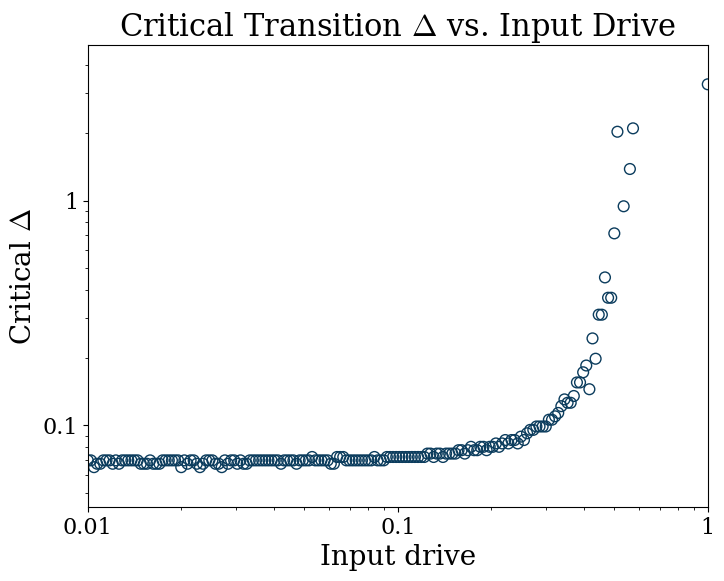

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

critical_gap_threshold = 1e-2

critical_deltas = np.full_like(input_range, np.nan)

for i, input_val in enumerate(input_range):
    gap_distances_for_input = np.abs(max_real_max[:, i])
    below_threshold_indices = np.where(gap_distances_for_input < critical_gap_threshold)[0]
    if len(below_threshold_indices) > 0:
        first_transition_index = below_threshold_indices[0]
        critical_deltas[i] = delta_range[first_transition_index]

plt.figure(figsize=(8, 6))

# Plot only the points where a critical delta was found (not NaN)
valid_indices = ~np.isnan(critical_deltas)
plt.scatter(input_range[valid_indices], critical_deltas[valid_indices],
            s=60, facecolors='none', edgecolors='#0b3c5d', label='Critical $\Delta$')

plt.xlabel('Input drive', fontsize=20)
plt.ylabel('Critical $\Delta$', fontsize=20)
plt.title('Critical Transition $\Delta$ vs. Input Drive', fontsize=22)

plt.xscale('log')

# Customize tick parameters for both axes
ax = plt.gca()

# Format both axes to use regular float notation
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
ax.xaxis.set_minor_formatter(ticker.NullFormatter())


# Optionally, set the y-axis to log scale if needed
if delta_scale == 'log-scale':
    plt.yscale('log')
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    
    print("Setting y-axis (Critical Delta) to log scale.")
    

# Set tick font sizes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set axis limits with padding
if np.any(valid_indices):
    plt.xlim([input_range[0], input_range[-1]])
    min_crit_delta = np.nanmin(critical_deltas)
    max_crit_delta = np.nanmax(critical_deltas)
    if delta_scale == 'log-scale':
        plt.ylim([min_crit_delta / 1.5, max_crit_delta * 1.5])
    else:
        padding = (max_crit_delta - min_crit_delta) * 0.1
        plt.ylim([min_crit_delta - padding, max_crit_delta + padding])
else:
    print("Warning: No critical delta transitions found below the threshold.")

# # Save the figure
# os.makedirs(folder_loc, exist_ok=True)
# file_name_crit = 'critical_delta_vs_input'
# file_save_path_crit = os.path.join(folder_loc, file_name_crit)

# plt.tight_layout()
# plt.savefig(f'{file_save_path_crit}.png', bbox_inches='tight')
# plt.savefig(f'{file_save_path_crit}.svg', format='svg', bbox_inches='tight', dpi=300)
# plt.savefig(f'{file_save_path_crit}.eps', format='eps', bbox_inches='tight', dpi=300)

plt.show()


/tmp/ipykernel_1791666/1380060424.py:10: RuntimeWarning: All-NaN slice encountered
  max_real_max = np.nanmax(max_real_each_trial.numpy(), axis=2)


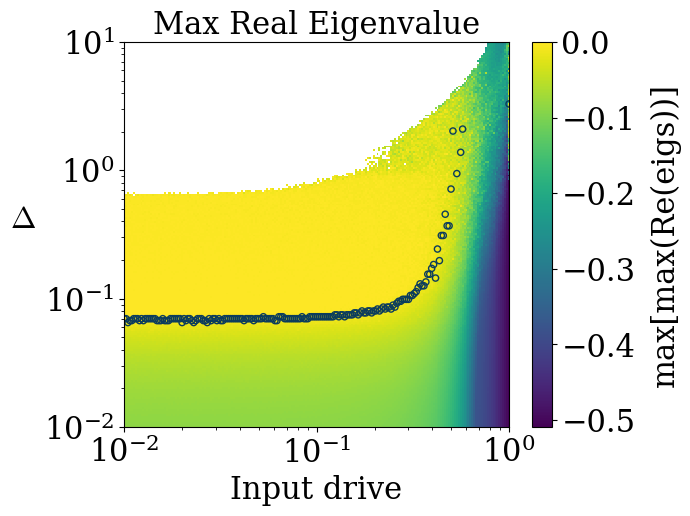

In [14]:
# define the threshold to be considered a non-gapped phase
critical_gap_threshold = 1e-2

# Compute the maximum real part for each trial (max over eigenvalue index)
max_real_each_trial = torch.max(eigvals.real, dim=3)[0] * 0.002  # shape: (num_delta, num_input, num_trials)

# find the max of the trials; ignore the trials with positive values
max_real_each_trial[max_real_each_trial > 0] = np.nan

max_real_max = np.nanmax(max_real_each_trial.numpy(), axis=2)

# find the values that are less than the threshold
bool_critically_slowed = np.abs(max_real_max) < critical_gap_threshold

# Determine vmin and vmax ignoring NaN values
vmin = np.nanmin(max_real_max)
vmax = np.nanmax(max_real_max)

# Plot the phase diagram for max(real(eigenvalues)) using a sequential colormap ("viridis")
plt.figure(figsize=(7.5, 5))
norm = mcolors.Normalize(vmin=vmin, vmax=0.0, clip=False)
mesh = plt.pcolormesh(input_range, delta_range, max_real_max, cmap='viridis', norm=norm)
# plt.plot(new_input_norm, delta_c, color='k', linewidth=2.0, label=r'$\Delta_c$')

plt.scatter(input_range[valid_indices], critical_deltas[valid_indices],
            s=20, facecolors='none', edgecolors='#0b3c5d', label='Critical $\Delta$')


colorbar = plt.colorbar(mesh, fraction=0.046, pad=0.04)
colorbar.ax.tick_params(labelsize=22)
colorbar.set_label('max[max(Re(eigs))]', fontsize=22, rotation=90, labelpad=10)

plt.xlabel('Input drive', fontsize=22)
plt.ylabel(r'$\Delta$', fontsize=22, rotation=0, labelpad=15)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title("Max Real Eigenvalue", fontsize=22)

ax = plt.gca()
if delta_scale == 'log-scale':
    plt.yscale('log')  # Ensure the axis is in log scale
    y_span = np.log10(delta_range[-1]) - np.log10(delta_range[0])
else:  
    y_span = delta_range[-1] - delta_range[0]

plt.xscale('log')
x_span = np.log10(input_range[-1]) - np.log10(input_range[0])
ax.set_aspect(x_span / y_span, adjustable='box')

plt.xlim([input_range[0], input_range[-1]])
plt.ylim([delta_range[0], delta_range[-1]])


plt.show()


### Find the values of delta at which normalization breaks down.

In [15]:
condition = torch.load(os.path.join(path, f'condition.pt'))
norm_fixed_point_y = torch.load(os.path.join(path, f'norm_fixed_point_y.pt'))
actual_fixed_point_y = torch.load(os.path.join(path, f'actual_fixed_point_y.pt'))
first_order_perturb_y = torch.load(os.path.join(path, f'first_order_perturb_y.pt'))

# where to save the figures
folder_loc_crit = f'../figures/mu_{mu}/fig_loss_of_normalization{model_type}'

In [16]:
# fit and find the intersection of mean and variance
stability_criterion_percent = 0.99
fitted_intersection = np.zeros((len(delta_range)))
idx = 0

for i, delta_val in enumerate(delta_range):
    actual_fp_y = actual_fixed_point_y[i, :, :, :]
    y_val = actual_fp_y[:, :, idx]

    y_val_mean = torch.nanmean(y_val, dim=1)
    y_val_std = utils.nanstd(y_val, dim=1)

    # check if unstable
    ratio_stable = torch.sum(~torch.isnan(y_val), dim=1) / num_trials
    mask = (ratio_stable > stability_criterion_percent).cpu().numpy()

    # fit the mean
    x_vals = np.array(input_range)[mask].astype(np.float64)
    y_vals = np.array(y_val_mean[mask]).astype(np.float64)
    coeffs = np.polyfit(np.log10(x_vals), y_vals, deg=5)
    poly_func = np.poly1d(coeffs)
    x_fit_mean = np.logspace(np.log10(x_vals.min()), np.log10(x_vals.max()), 200)
    y_fit_mean = poly_func(np.log10(x_fit_mean))

    # fit the std
    x_vals = np.array(input_range)[mask].astype(np.float64)
    y_vals = np.array(y_val_std[mask]).astype(np.float64)
    coeffs = np.polyfit(np.log10(x_vals), y_vals, deg=5)
    poly_func = np.poly1d(coeffs)
    x_fit_std = np.logspace(np.log10(x_vals.min()), np.log10(x_vals.max()), 200)
    y_fit_std = poly_func(np.log10(x_fit_std))

    # find the intersection
    diff = y_fit_mean - y_fit_std

    # Find indices where the difference changes sign.
    sign_change_idxs = np.where(np.diff(np.sign(diff)))[0]

    if sign_change_idxs.size > 0:
        # Take the first crossing.
        idx1 = sign_change_idxs[0]
        # Define the two x values and the corresponding differences.
        x0, x1 = x_fit_mean[idx1], x_fit_mean[idx1 + 1]
        d0, d1 = diff[idx1], diff[idx1 + 1]
        
        # Linear interpolation to estimate the intersection.
        t = -d0 / (d1 - d0)
        x_intersect = x0 + t * (x1 - x0)
        
        fitted_intersection[i] = x_intersect
    else:
        fitted_intersection[i] = np.nan

/tmp/ipykernel_1791666/2126215066.py:20: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(np.log10(x_vals), y_vals, deg=5)
/tmp/ipykernel_1791666/2126215066.py:28: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(np.log10(x_vals), y_vals, deg=5)
/tmp/ipykernel_1791666/2126215066.py:20: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(np.log10(x_vals), y_vals, deg=5)
/tmp/ipykernel_1791666/2126215066.py:28: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(np.log10(x_vals), y_vals, deg=5)
/tmp/ipykernel_1791666/2126215066.py:20: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(np.log10(x_vals), y_vals, deg=5)
/tmp/ipykernel_1791666/2126215066.py:28: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(np.log10(x_vals), y_vals, deg=5)
/tmp/ipykernel_1791666/2126215066.py:20: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(np.log10(x_vals), y_vals, deg=5)

Setting y-axis (Critical Delta) to log scale.


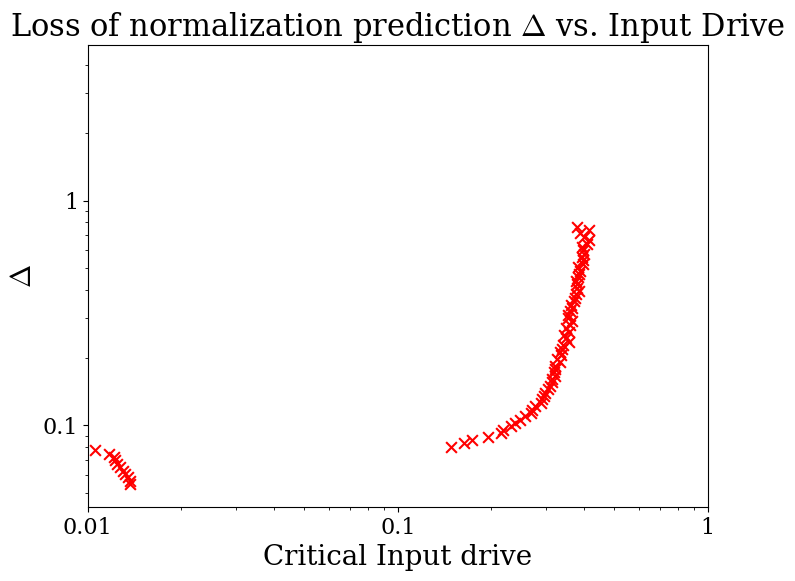

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

plt.figure(figsize=(8, 6))

plt.scatter(fitted_intersection, delta_range, color='r', s=60, marker='x')

plt.xlabel('Critical Input drive', fontsize=20)
plt.ylabel('$\Delta$', fontsize=20)
plt.title('Loss of normalization prediction $\Delta$ vs. Input Drive', fontsize=22)

plt.xscale('log')

# Customize tick parameters for both axes
ax = plt.gca()

# Format both axes to use regular float notation
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
ax.xaxis.set_minor_formatter(ticker.NullFormatter())


# Optionally, set the y-axis to log scale if needed
if delta_scale == 'log-scale':
    plt.yscale('log')
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    
    print("Setting y-axis (Critical Delta) to log scale.")
    

# Set tick font sizes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set axis limits with padding
if np.any(valid_indices):
    plt.xlim([input_range[0], input_range[-1]])
    min_crit_delta = np.nanmin(critical_deltas)
    max_crit_delta = np.nanmax(critical_deltas)
    if delta_scale == 'log-scale':
        plt.ylim([min_crit_delta / 1.5, max_crit_delta * 1.5])
    else:
        padding = (max_crit_delta - min_crit_delta) * 0.1
        plt.ylim([min_crit_delta - padding, max_crit_delta + padding])
else:
    print("Warning: No critical delta transitions found below the threshold.")

# Save the figure
# os.makedirs(folder_loc_crit, exist_ok=True)
# file_name_crit = 'delta_vs_critical_input'
# file_save_path_crit = os.path.join(folder_loc_crit, file_name_crit)

# plt.tight_layout()
# plt.savefig(f'{file_save_path_crit}.png', bbox_inches='tight')
# plt.savefig(f'{file_save_path_crit}.svg', format='svg', bbox_inches='tight', dpi=300)
# plt.savefig(f'{file_save_path_crit}.eps', format='eps', bbox_inches='tight', dpi=300)

plt.show()


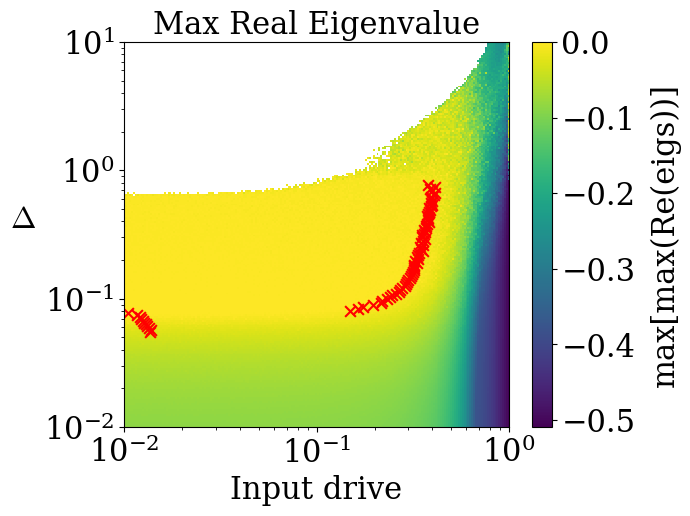

In [18]:
# Plot the phase diagram for max(real(eigenvalues)) using a sequential colormap ("viridis")
plt.figure(figsize=(7.5, 5))
norm = mcolors.Normalize(vmin=vmin, vmax=0.0, clip=False)
mesh = plt.pcolormesh(input_range, delta_range, max_real_max, cmap='viridis', norm=norm)


plt.scatter(fitted_intersection, delta_range, color='r', s=60, marker='x')


colorbar = plt.colorbar(mesh, fraction=0.046, pad=0.04)
colorbar.ax.tick_params(labelsize=22)
colorbar.set_label('max[max(Re(eigs))]', fontsize=22, rotation=90, labelpad=10)

plt.xlabel('Input drive', fontsize=22)
plt.ylabel(r'$\Delta$', fontsize=22, rotation=0, labelpad=15)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title("Max Real Eigenvalue", fontsize=22)

ax = plt.gca()
if delta_scale == 'log-scale':
    plt.yscale('log')  # Ensure the axis is in log scale
    y_span = np.log10(delta_range[-1]) - np.log10(delta_range[0])
else:  
    y_span = delta_range[-1] - delta_range[0]

plt.xscale('log')
x_span = np.log10(input_range[-1]) - np.log10(input_range[0])
ax.set_aspect(x_span / y_span, adjustable='box')

plt.xlim([input_range[0], input_range[-1]])
plt.ylim([delta_range[0], delta_range[-1]])


plt.show()


### Plotting all curves on the same plot.

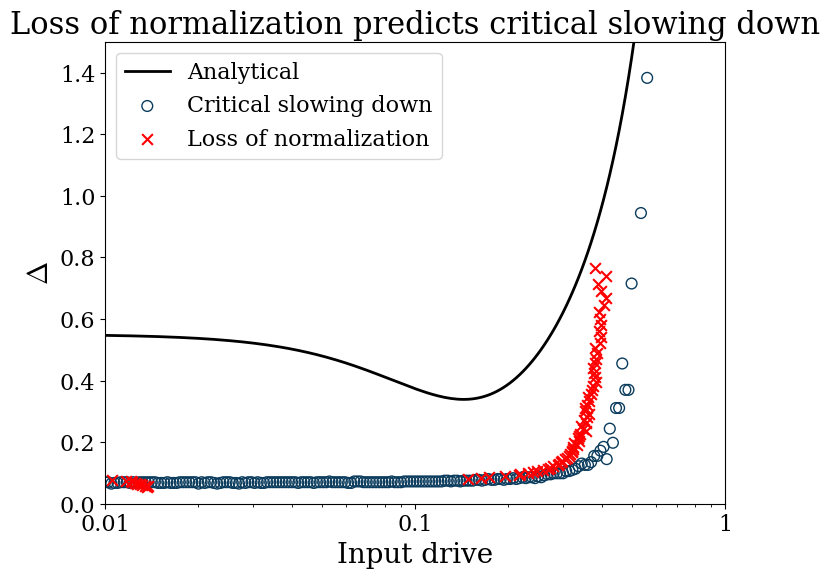

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

plt.figure(figsize=(8, 6))

# plot the analytical prediction
plt.plot(new_input_norm, delta_c, color='k', linewidth=2.0, label=r'Analytical')

# Plot only the points where a critical delta was found (not NaN)
valid_indices = ~np.isnan(critical_deltas)
plt.scatter(input_range[valid_indices], critical_deltas[valid_indices],
            s=60, facecolors='none', edgecolors='#0b3c5d', label='Critical slowing down')

plt.scatter(fitted_intersection, delta_range, color='r', s=60, marker='x', label='Loss of normalization')

plt.xlabel('Input drive', fontsize=20)
plt.ylabel('$\Delta$', fontsize=20)
plt.title('Loss of normalization predicts critical slowing down', fontsize=22)

# plot legend
plt.legend(fontsize=16, loc='upper left')

plt.xscale('log')

# Customize tick parameters for both axes
ax = plt.gca()

# Format both axes to use regular float notation
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
ax.xaxis.set_minor_formatter(ticker.NullFormatter())


# Optionally, set the y-axis to log scale if needed
# if delta_scale == 'log-scale':
#     plt.yscale('log')
#     ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%g'))
#     ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    
#     print("Setting y-axis (Critical Delta) to log scale.")
    

# Set tick font sizes
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Set axis limits with padding
if np.any(valid_indices):
    plt.xlim([input_range[0], input_range[-1]])
    min_crit_delta = np.nanmin(critical_deltas)
    max_crit_delta = np.nanmax(critical_deltas)
    if delta_scale == 'log-scale':
        # plt.ylim([min_crit_delta / 1.5, max_crit_delta * 1.5])
        plt.ylim([0.0, 1.5])
    else:
        padding = (max_crit_delta - min_crit_delta) * 0.1
        # plt.ylim([min_crit_delta - padding, max_crit_delta + padding])
        plt.ylim([0.0, 1.5])
else:
    print("Warning: No critical delta transitions found below the threshold.")

    

# Save the figure
# os.makedirs(folder_loc_crit, exist_ok=True)
# file_name_crit = 'lines_together'
# file_save_path_crit = os.path.join(folder_loc_crit, file_name_crit)

# plt.tight_layout()
# plt.savefig(f'{file_save_path_crit}.png', bbox_inches='tight')
# plt.savefig(f'{file_save_path_crit}.svg', format='svg', bbox_inches='tight', dpi=300)
# plt.savefig(f'{file_save_path_crit}.eps', format='eps', bbox_inches='tight', dpi=300)

plt.show()


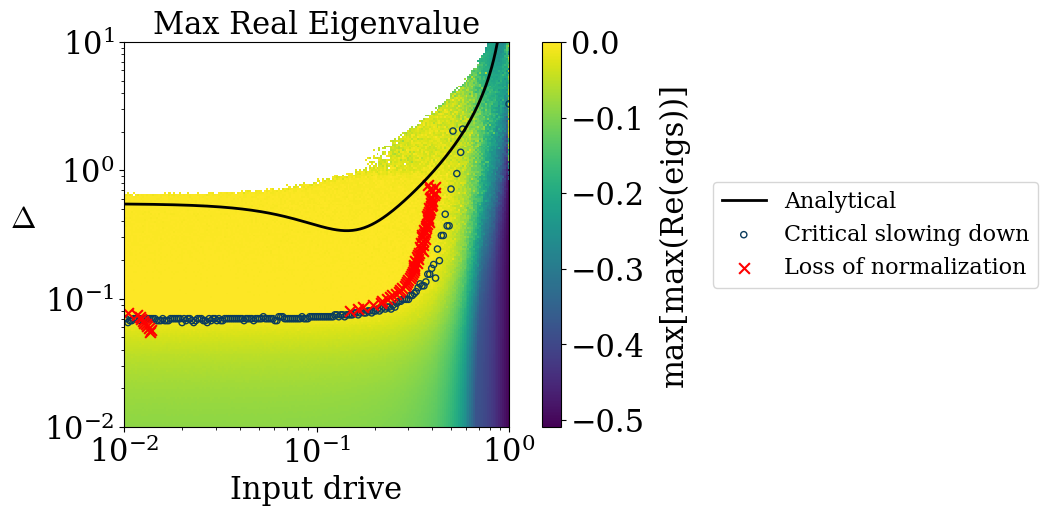

In [20]:
# Plot the phase diagram for max(real(eigenvalues)) using a sequential colormap ("viridis")
plt.figure(figsize=(10.5, 5))

norm = mcolors.Normalize(vmin=vmin, vmax=0.0, clip=False)
mesh = plt.pcolormesh(input_range, delta_range, max_real_max, cmap='viridis', norm=norm)
plt.plot(new_input_norm, delta_c, color='k', linewidth=2.0, label=r'Analytical')

plt.scatter(input_range[valid_indices], critical_deltas[valid_indices],
            s=20, facecolors='none', edgecolors='#0b3c5d', label='Critical slowing down')

plt.scatter(fitted_intersection, delta_range, color='r', s=60, marker='x', label='Loss of normalization')


colorbar = plt.colorbar(mesh, fraction=0.046, pad=0.04)
colorbar.ax.tick_params(labelsize=22)
colorbar.set_label('max[max(Re(eigs))]', fontsize=22, rotation=90, labelpad=10)

plt.xlabel('Input drive', fontsize=22)
plt.ylabel(r'$\Delta$', fontsize=22, rotation=0, labelpad=15)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title("Max Real Eigenvalue", fontsize=22)

ax = plt.gca()
if delta_scale == 'log-scale':
    plt.yscale('log')  # Ensure the axis is in log scale
    y_span = np.log10(delta_range[-1]) - np.log10(delta_range[0])
else:  
    y_span = delta_range[-1] - delta_range[0]

plt.xscale('log')
x_span = np.log10(input_range[-1]) - np.log10(input_range[0])
ax.set_aspect(x_span / y_span, adjustable='box')

plt.xlim([input_range[0], input_range[-1]])
plt.ylim([delta_range[0], delta_range[-1]])

ax.legend(loc='center left', bbox_to_anchor=(1.5, 0.5), fontsize=16) # Adjust fontsize as needed


# Save the figure
# os.makedirs(folder_loc_crit, exist_ok=True)
# file_name_crit = 'phase_diagram_lines_together'
# file_save_path_crit = os.path.join(folder_loc_crit, file_name_crit)

# plt.tight_layout()
# plt.savefig(f'{file_save_path_crit}.png', bbox_inches='tight')
# plt.savefig(f'{file_save_path_crit}.svg', format='svg', bbox_inches='tight', dpi=300)
# plt.savefig(f'{file_save_path_crit}.eps', format='eps', bbox_inches='tight', dpi=300)


plt.show()

In [21]:
# find the line separating the stability boundaries
def majority_condition(conditions_1d):
    """
    Given a 1D array of trial conditions (length = num_trials),
    return the single integer condition by majority vote.
    Tie-break: pick the smallest condition ID among ties.

    We unify 3 -> 0 (both are 'limit cycle').
    """
    # Convert 3 -> 0 for counting
    conditions_unified = np.where(np.isin(conditions_1d, 3), 0, conditions_1d)

    unique_conds, counts = np.unique(conditions_unified, return_counts=True)

    # Find which condition has the maximum count
    max_count_index = np.argmax(counts)
    final_cond = unique_conds[max_count_index]
    return final_cond


# -------------------------------------------------------------------------
# 3) Compute (for each delta, input) the majority condition among the trials.
# -------------------------------------------------------------------------
num_delta, num_input, num_trials = condition.shape
final_condition_2d = np.zeros((num_delta, num_input), dtype=int)

for i_d in range(num_delta):
    for i_in in range(num_input):
        cond_1d = condition[i_d, i_in, :].cpu().numpy()
        c = majority_condition(cond_1d)
        final_condition_2d[i_d, i_in] = c  # 0, 1, or 2 by majority


# -------------------------------------------------------------------------
# 4) Among the "stable" final conditions (==2),
#    refine to condition=5 if the avg largest real eigenvalue among
#    *stable trials only* is > some threshold but still < 0
#    (i.e., negative but close to zero => "slowing down").
#
#    Adjust 'slowing_threshold' as desired.
# -------------------------------------------------------------------------
slowing_threshold = 1e-2  # example threshold for "slowing down"

# Get the real parts of eigenvalues: shape (num_delta, num_input, num_trials, 2*N)
eigvals_real = eigvals.real * 0.002

# For each (delta, input), find the *stable trials* among the 100
# and compute the max of the largest real eigenvalue in those stable trials.
for i_d in range(num_delta):
    for i_in in range(num_input):

        if final_condition_2d[i_d, i_in] == 2:
            # Identify stable trials at this point
            cond_1d = condition[i_d, i_in, :].cpu().numpy()
            stable_mask = (cond_1d == 2)

            if not np.any(stable_mask):
                # No truly stable trials => skip
                continue

            # Extract the real eigenvalues of stable trials
            these_eigs = eigvals_real[i_d, i_in, stable_mask, :]  # shape = (num_stable, 2*N)
            # largest real part per stable trial
            max_real_each_trial = np.nanmax(these_eigs, axis=1)       # shape = (num_stable,)
            max_real_each_trial[max_real_each_trial > 0] = np.nan

            # average largest real part
            max_real_max_val = np.nanmax(max_real_each_trial)

            # If it's "close to zero" but negative (>-0.02, say) => define condition=5
            if (np.abs(max_real_max_val) < slowing_threshold):
                final_condition_2d[i_d, i_in] = 5

cond_map = {0: 0, 1: 1, 2: 0, 5: 0}  # Both stable and slowing down are now 2

# Build an integer array for pcolormesh
plot_data = np.full_like(final_condition_2d, fill_value=-1, dtype=int)
for c_old, c_new in cond_map.items():
    plot_data[final_condition_2d == c_old] = c_new

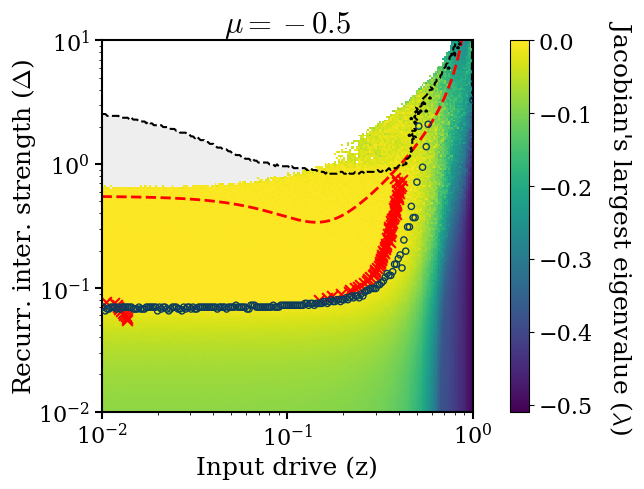

In [22]:
# Define the mapping dictionary: combine condition 2 and 5 into a single category.
plt.figure(figsize=(10.5, 5))

norm = mcolors.Normalize(vmin=vmin, vmax=0.0, clip=False)
mesh = plt.pcolormesh(input_range, delta_range, max_real_max, cmap='viridis', norm=norm, zorder=0)

plt.plot(new_input_norm, delta_c, color='r', linestyle='--', linewidth=2.0, label=r'Analytical', zorder=0)

plt.scatter(input_range[valid_indices], critical_deltas[valid_indices],
            s=20, facecolors='none', edgecolors='#0b3c5d', label='Critical slowing down', zorder=3)

plt.scatter(fitted_intersection, delta_range, color='r', s=60, marker='x', label='Loss of normalization', zorder=2)

X, Y = np.meshgrid(input_range, delta_range)

# Define the boundary levels between the discrete condition values.
# The boundaries between 0 and 1 is at 0.5, and between 1 and 2 is at 1.5.
boundary_levels = [0.5]

# Plot the contour lines with a dotted line style.
plt.contour(X, Y, plot_data, levels=boundary_levels, colors='k', linestyles='dashed')
# make blue background wherever the boudary level is 0:
plt.contourf(X, Y, plot_data, levels=[-1, 0], colors=['#eeeeee'], alpha=1, zorder=-1)

colorbar = plt.colorbar(mesh, fraction=0.046, pad=0.04)
colorbar.ax.tick_params(labelsize=16)
colorbar.set_label(rf"Jacobian's largest eigenvalue ($\lambda$)", fontsize=18, rotation=270, labelpad=30)

plt.xlabel('Input drive (z)', fontsize=18)
plt.ylabel(r'Recurr. inter. strength ($\Delta$)', fontsize=18, rotation=90, labelpad=0)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title(rf"$\mu = {mu}$", fontsize=22)

ax = plt.gca()

box_line_width = 1.5 # Adjust thickness as needed
for spine in ax.spines.values():
    spine.set_linewidth(box_line_width)

ax.tick_params(
    axis='both',
    which='major',
    labelsize=16,
    width=1.5,    # tick thickness
    length=5.0    # tick length
)

if delta_scale == 'log-scale':
    plt.yscale('log')  # Ensure the axis is in log scale
    y_span = np.log10(delta_range[-1]) - np.log10(delta_range[0])
else:  
    y_span = delta_range[-1] - delta_range[0]

plt.xscale('log')
x_span = np.log10(input_range[-1]) - np.log10(input_range[0])
ax.set_aspect(x_span / y_span, adjustable='box')

plt.xlim([input_range[0], input_range[-1]])
plt.ylim([delta_range[0], delta_range[-1]])

# ax.legend(loc='center left', bbox_to_anchor=(1.5, 0.5), fontsize=16) # Adjust fontsize as needed

# make background lines thicker
for line in ax.get_lines():
    line.set_linewidth(2)


# Save the figure
os.makedirs(folder_loc_crit, exist_ok=True)
file_name_crit = 'phase_diagram_lines_together_limit_cycle_line'
file_save_path_crit = os.path.join(folder_loc_crit, file_name_crit)

plt.tight_layout()
plt.savefig(f'{file_save_path_crit}.png', bbox_inches='tight')
plt.savefig(f'{file_save_path_crit}.svg', format='svg', bbox_inches='tight', dpi=300)
plt.savefig(f'{file_save_path_crit}.eps', format='eps', bbox_inches='tight', dpi=300)

plt.show()

In [23]:
def select_points_by_log_distance(x_data, y_data, target_log_distance):
    """
    Selects points such that the Euclidean distance between consecutive selected
    points in log10-log10 space is approximately target_log_distance.

    Args:
        x_data (np.ndarray): Array of x-coordinates.
        y_data (np.ndarray): Array of y-coordinates.
        target_log_distance (float): The desired distance in log10-log10 space.
                                     Must be positive.

    Returns:
        np.ndarray: An array of indices corresponding to the selected points
                    from the original x_data and y_data arrays. Returns an
                    empty array if no points are selected or valid.
    """
    if target_log_distance <= 0:
        raise ValueError("target_log_distance must be positive.")

    # Ensure inputs are numpy arrays
    x_data = np.asarray(x_data)
    y_data = np.asarray(y_data)

    if len(x_data) != len(y_data):
        raise ValueError("x_data and y_data must have the same length.")
    if len(x_data) == 0:
        return np.array([], dtype=int) # Return empty array

    # --- Filter out non-positive values necessary for log scaling ---
    valid_mask = (x_data > 0) & (y_data > 0)
    original_indices = np.arange(len(x_data))

    valid_original_indices = original_indices[valid_mask]
    x_valid = x_data[valid_mask]
    y_valid = y_data[valid_mask]

    if len(x_valid) == 0:
        return np.array([], dtype=int) # Return empty array if no points valid for log

    # --- Calculate log coordinates ---
    log10_x = np.log10(x_valid)
    log10_y = np.log10(y_valid)

    # --- Select points based on distance ---
    # Check if there's at least one valid point to select
    if len(valid_original_indices) == 0:
         return np.array([], dtype=int) # Should technically be caught by len(x_valid)==0 check

    selected_original_indices = [valid_original_indices[0]] # Always include the first valid point
    last_log_x = log10_x[0]
    last_log_y = log10_y[0]

    for i in range(1, len(log10_x)):
        current_log_x = log10_x[i]
        current_log_y = log10_y[i]

        # Calculate Euclidean distance in log-log space
        distance = np.sqrt((current_log_x - last_log_x)**2 + (current_log_y - last_log_y)**2)

        # If the distance is sufficient, select the point
        if distance >= target_log_distance:
            selected_original_indices.append(valid_original_indices[i])
            # Update the last selected point's coordinates
            last_log_x = current_log_x
            last_log_y = current_log_y

    return np.array(selected_original_indices, dtype=int) # Return the array of indices

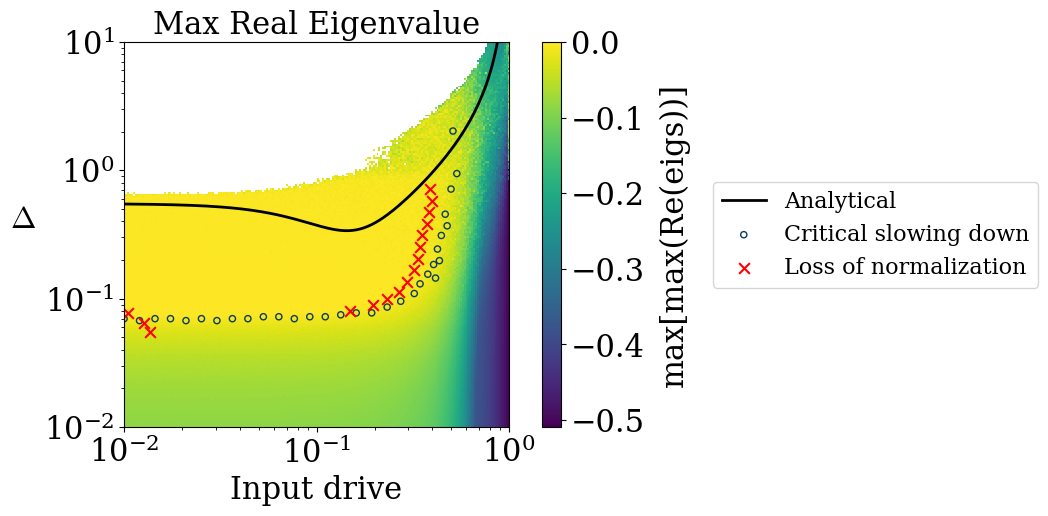

In [24]:
# --- (Code defining input_range, delta_range, valid_indices, critical_deltas, etc.) ---

# --- (Full definition of select_points_by_log_distance function HERE) ---

# --- NEW PARAMETERS FOR SKIPPING POINTS ---
target_log_dist_circles = 0.08
target_log_dist_crosses = 0.08
# --- END OF NEW PARAMETERS ---

# Plot the phase diagram
plt.figure(figsize=(10.5, 5))
# --- (pcolormesh, plot analytical line) ---
norm = mcolors.Normalize(vmin=vmin, vmax=0.0, clip=False) # Assuming vmin is defined
mesh = plt.pcolormesh(input_range, delta_range, max_real_max, cmap='viridis', norm=norm)
plt.plot(new_input_norm, delta_c, color='k', linewidth=2.0, label=r'Analytical')


# --- Prepare and plot blue circles ('Critical slowing down') ---
x_circles_all = input_range[valid_indices]
y_circles_all = critical_deltas[valid_indices]

# Select indices based on log distance
# NOW this call should receive an array back from the correctly defined function
selected_indices_circles = select_points_by_log_distance(
    x_circles_all, y_circles_all, target_log_dist_circles
)

# remove last three points from these indices
selected_indices_circles = selected_indices_circles[:-3]

# Plot the selected blue circles using the obtained indices
# The len() check will now work correctly on the returned array
if len(selected_indices_circles) > 0:
    plt.scatter(x_circles_all[selected_indices_circles], y_circles_all[selected_indices_circles],
                s=20, facecolors='none', edgecolors='#0b3c5d', label='Critical slowing down')
else:
    print("Warning: No 'Critical slowing down' points selected based on log distance.")
    plt.scatter([], [], s=20, facecolors='none', edgecolors='#0b3c5d', label='Critical slowing down')


# --- Prepare and plot red crosses ('Loss of normalization') ---
x_crosses_all = fitted_intersection
y_crosses_all = delta_range

selected_indices_crosses = select_points_by_log_distance(
    x_crosses_all, y_crosses_all, target_log_dist_crosses
)

if len(selected_indices_crosses) > 0:
    plt.scatter(x_crosses_all[selected_indices_crosses], y_crosses_all[selected_indices_crosses],
                color='r', s=60, marker='x', label='Loss of normalization')
else:
    print("Warning: No 'Loss of normalization' points selected based on log distance.")
    plt.scatter([], [], color='r', s=60, marker='x', label='Loss of normalization')

colorbar = plt.colorbar(mesh, fraction=0.046, pad=0.04)
colorbar.ax.tick_params(labelsize=22)
colorbar.set_label('max[max(Re(eigs))]', fontsize=22, rotation=90, labelpad=10)

plt.xlabel('Input drive', fontsize=22)
plt.ylabel(r'$\Delta$', fontsize=22, rotation=0, labelpad=15)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.title("Max Real Eigenvalue", fontsize=22)

ax = plt.gca()
if delta_scale == 'log-scale':
    plt.yscale('log')  # Ensure the axis is in log scale
    y_span = np.log10(delta_range[-1]) - np.log10(delta_range[0])
else:  
    y_span = delta_range[-1] - delta_range[0]

plt.xscale('log')
x_span = np.log10(input_range[-1]) - np.log10(input_range[0])
ax.set_aspect(x_span / y_span, adjustable='box')

plt.xlim([input_range[0], input_range[-1]])
plt.ylim([delta_range[0], delta_range[-1]])

ax.legend(loc='center left', bbox_to_anchor=(1.5, 0.5), fontsize=16) # Adjust fontsize as needed

# Save the figure
# os.makedirs(folder_loc_crit, exist_ok=True)
# file_name_crit = 'phase_diagram_lines_together_thinned'
# file_save_path_crit = os.path.join(folder_loc_crit, file_name_crit)

# plt.tight_layout()
# plt.savefig(f'{file_save_path_crit}.png', bbox_inches='tight')
# plt.savefig(f'{file_save_path_crit}.svg', format='svg', bbox_inches='tight', dpi=300)
# plt.savefig(f'{file_save_path_crit}.eps', format='eps', bbox_inches='tight', dpi=300)


plt.show() # Example end